# 2. 데이터 수집

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [4]:
df_raw = pd.read_csv('data/titanic.csv')
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 데이터 특성 확인

In [6]:
df_raw.shape

(891, 12)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_raw.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### 연속형 변수 특성 및 이상치 확인

<AxesSubplot:>

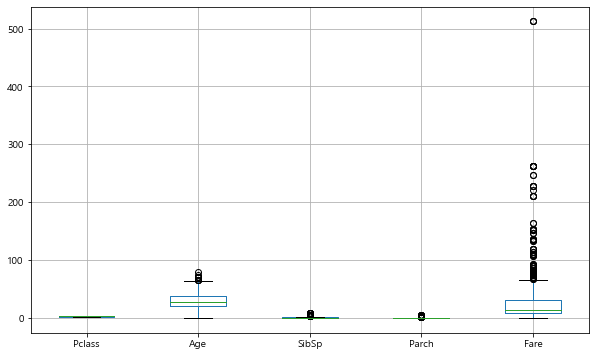

In [31]:
df_raw[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].boxplot(figsize=(10, 6))

###### 범주형 변수의 특성 확인

<AxesSubplot:ylabel='Sex'>

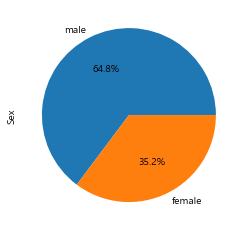

In [28]:
df_raw['Sex'].value_counts().plot.pie(y = 'Sex', autopct = '%.1f%%')

<AxesSubplot:ylabel='Embarked'>

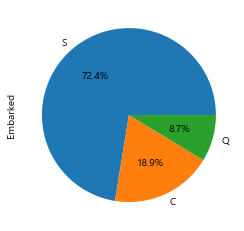

In [32]:
df_raw['Embarked'].value_counts().plot.pie(y = 'Sex', autopct = '%.1f%%')

### 결측치 처리

###### 탑승지

In [34]:
df_raw['Embarked'].isnull().sum()

2

- 최빈값으로 대체하기로 결정

In [35]:
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
df_raw['Embarked'].fillna('S', inplace=True)

###### 나이
- 평균으로 대체하기로 결정

In [38]:
df_raw['Age'].fillna(df_raw['Age'].mean(), inplace = True)

- 소수점 반올림

In [39]:
df_raw['Age'] = df_raw['Age'].astype(int)

###### 객실 번호
- Gita로 대체

In [40]:
df_raw['Cabin'].fillna('Gita', inplace = True)

In [41]:
df_raw.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 파생변수 생성

- Cabin 앞자리만 추출

In [45]:
df_raw['Cabin_gb'] = df_raw['Cabin'].str.get(0)

- 나이를 기준으로 파생변수 생성

In [57]:
df_raw.loc[df_raw['Age'] <= 14, 'Age_gb'] = 'Child'
df_raw.loc[(df_raw['Age'] > 14) & (df_raw['Age'] <= 28), 'Age_gb'] = "Young"
df_raw.loc[(df_raw['Age'] > 28) & (df_raw['Age'] <= 42), 'Age_gb'] = "Middle"
df_raw.loc[(df_raw['Age'] > 42) & (df_raw['Age'] <= 56), 'Age_gb'] = "Prime"
df_raw.loc[df_raw['Age'] > 56, 'Age_gb'] = 'OLD'

- 요금을 구간화

In [59]:
df_raw.loc[df_raw['Fare'] <= 50, 'Fare_gb'] = 0
df_raw.loc[(df_raw['Fare'] > 50) & (df_raw['Fare'] <= 100), 'Fare_gb'] = 1
df_raw.loc[(df_raw['Fare'] > 100) & (df_raw['Fare'] <= 150), 'Fare_gb'] = 2
df_raw.loc[(df_raw['Fare'] > 150) & (df_raw['Fare'] <= 200), 'Fare_gb'] = 3
df_raw.loc[df_raw['Fare'] > 200, 'Fare_gb'] = 4

- 가족수 계산

In [60]:
df_raw['Family'] = df_raw['Parch'] + df_raw['SibSp']

In [61]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_gb,Age_gb,Fare_gb,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Gita,S,G,Young,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C,Middle,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Gita,S,G,Young,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C,Middle,1.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Gita,S,G,Middle,0.0,0


# 3. 탐색적 분석

### 범주형 vs 연속형

###### 연령, 가족 수, 요금에 따른 생존여부 확인


<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

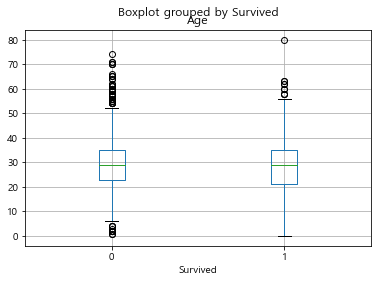

In [66]:
df_raw.boxplot(column=['Age'], by = 'Survived')

<AxesSubplot:title={'center':'Family'}, xlabel='Survived'>

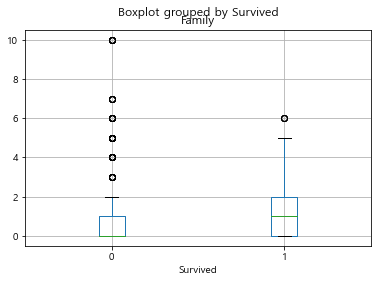

In [65]:
df_raw.boxplot(column=['Family'], by = 'Survived')

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

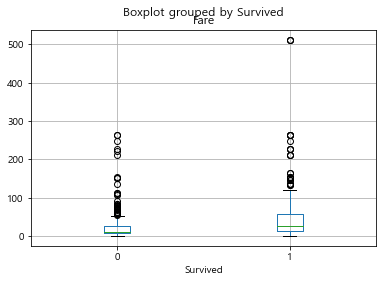

In [67]:
df_raw.boxplot(column=['Fare'], by = 'Survived')

### 범주형 vs 범주형 

###### 성별, 선실구분, 탑승지에 따른 생존여부 확인

- 성별

In [69]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Sex', values = 'Age', aggfunc='count')
# values = 'Age' 한 이유는 단순히 카운트하기위해서인가..
df_pivot

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

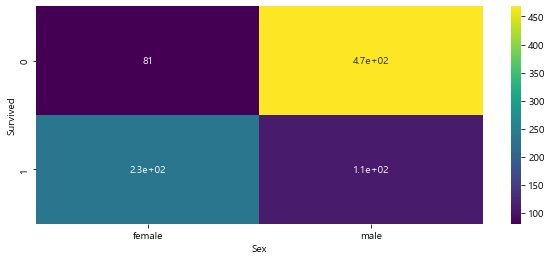

In [70]:
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

- 선실 구분

<AxesSubplot:xlabel='Cabin_gb', ylabel='Survived'>

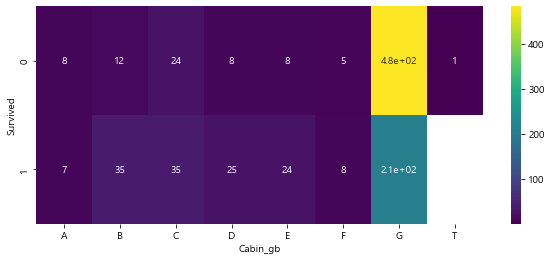

In [72]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Cabin_gb', values = 'Age', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

- 탑승지

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

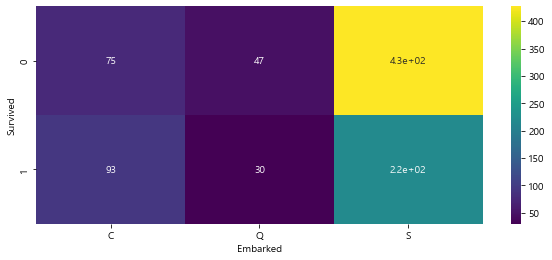

In [73]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Embarked', values = 'Age', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

- 연령대

<AxesSubplot:xlabel='Age_gb', ylabel='Survived'>

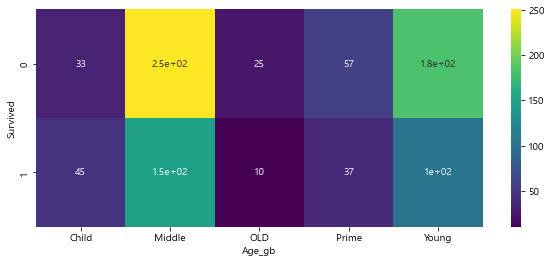

In [74]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Age_gb', values = 'Age', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

- 요금 구간

<AxesSubplot:xlabel='Fare_gb', ylabel='Survived'>

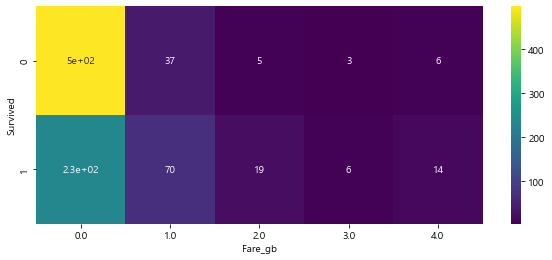

In [77]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Fare_gb', values = 'Age', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

- 승객 등급

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

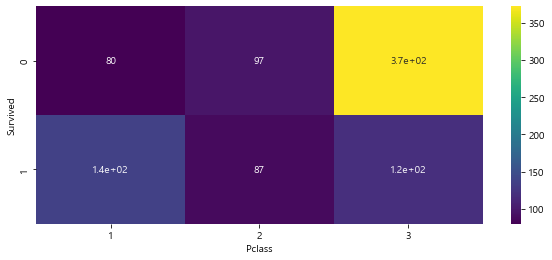

In [78]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc='count')
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, annot = True, cmap = 'viridis')

### 통계적 가설검정

###### 나이에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. 정규성 검정

In [81]:
df_age_0 = df_raw.loc[df_raw['Survived'] == 0, 'Age']
df_age_1 = df_raw.loc[df_raw['Survived'] == 1, 'Age']

statistic, p = stats.shapiro(df_age_0)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

statistic, p = stats.shapiro(df_age_1)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

Shapiro-Wilk Test: statistic = 0.9363741874694824, p-value = 1.4959260840143908e-14
Shapiro-Wilk Test: statistic = 0.9704092741012573, p-value = 1.8811008430930087e-06


2. 맨 휘트니U 검정 ( 둘 다 정규성을 띄지 않는 경우 사용한다)

In [82]:
stats.mannwhitneyu(df_age_0, df_age_1)

MannwhitneyuResult(statistic=97982.0, pvalue=0.26945959587471746)

- H0 채택, 나이에 따른 생존여부에는 차이가 없음

###### 요금에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. 정규성 검정

In [83]:
df_fare_0 = df_raw.loc[df_raw['Survived'] == 0, 'Fare']
df_fare_1 = df_raw.loc[df_raw['Survived'] == 1, 'Fare']

statistic, p = stats.shapiro(df_fare_0)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

statistic, p = stats.shapiro(df_fare_1)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

Shapiro-Wilk Test: statistic = 0.513036847114563, p-value = 3.233740189307736e-36
Shapiro-Wilk Test: statistic = 0.5967270731925964, p-value = 1.8337420335182354e-27


2. 맨 휘트니U 검정 ( 둘 다 정규성을 띄지 않는 경우 사용한다)

In [84]:
stats.mannwhitneyu(df_fare_0, df_fare_1)

MannwhitneyuResult(statistic=57806.5, pvalue=4.553477179250237e-22)

- H1 채택, 요금에 따른 생존여부에는 차이가 있음

###### 가족 수에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. 정규성 검정

In [85]:
df_fam_0 = df_raw.loc[df_raw['Survived'] == 0, 'Family']
df_fam_1 = df_raw.loc[df_raw['Survived'] == 1, 'Family']

statistic, p = stats.shapiro(df_fam_0)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

statistic, p = stats.shapiro(df_fam_1)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

Shapiro-Wilk Test: statistic = 0.5514746904373169, p-value = 3.8590348812949254e-35
Shapiro-Wilk Test: statistic = 0.7630345821380615, p-value = 7.26207325452501e-22


2. 맨 휘트니U 검정 ( 둘 다 정규성을 띄지 않는 경우 사용한다)

In [87]:
stats.mannwhitneyu(df_fam_0, df_fam_1)

MannwhitneyuResult(statistic=77659.0, pvalue=7.970801270915872e-07)

- H1 채택, 가족 수에 따른 생존여부에는 차이가 있음

###### 성별에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. Chi square 검정

In [88]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Sex', values = 'Age', aggfunc='count')
df_pivot

Sex,female,male
Survived,,
0,81,468
1,233,109


In [93]:
chi, pval, dof, expected = stats.chi2_contingency(df_pivot)
print('P-value =', pval)

P-value = 1.1973570627755645e-58


- H1 채택, 성별에 따른 생존여부에는 차이가 있음

###### 탑승지에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. Chi square 검정

In [95]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Embarked', values = 'Age', aggfunc='count')
df_pivot

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [96]:
chi, pval, dof, expected = stats.chi2_contingency(df_pivot)
print('P-value =', pval)

P-value = 2.3008626481449577e-06


- H1 채택, 탑승지에 따른 생존여부에는 차이가 있음

###### 좌석 등급에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. Chi square 검정

In [97]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc='count')
df_pivot

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [98]:
chi, pval, dof, expected = stats.chi2_contingency(df_pivot)
print('P-value =', pval)

P-value = 4.549251711298793e-23


- H1 채택, 좌석 등급에 따른 생존여부에는 차이가 있음

###### 선실 구분에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. Chi square 검정

In [101]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Cabin_gb', values = 'Age', aggfunc='count')
df_pivot.drop(columns = 'T', inplace = True)

In [102]:
chi, pval, dof, expected = stats.chi2_contingency(df_pivot)
print('P-value =', pval)

P-value = 7.128796757994192e-19


- H1 채택, 선실 구분에 따른 생존여부에는 차이가 있음

###### 연령대에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. Chi square 검정

In [104]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Age_gb', values = 'Age', aggfunc='count')
df_pivot

Age_gb,Child,Middle,OLD,Prime,Young
Survived,,,,,
0,33,251,25,57,183
1,45,147,10,37,103


In [105]:
chi, pval, dof, expected = stats.chi2_contingency(df_pivot)
print('P-value =', pval)

P-value = 0.005154994879112913


- H0 채택, 연령대에 따른 생존여부에는 차이가 없음

###### 요금구간에 따라 생존여부에 차이가 있는지 검정
- H0 : 차이가 없다  
- H1 : 차이가 있다

1. Chi square 검정

In [106]:
df_pivot = df_raw.pivot_table(index = 'Survived', columns = 'Fare_gb', values = 'Age', aggfunc='count')
df_pivot

Fare_gb,0.0,1.0,2.0,3.0,4.0
Survived,,,,,
0,498,37,5,3,6
1,233,70,19,6,14


In [107]:
chi, pval, dof, expected = stats.chi2_contingency(df_pivot)
print('P-value =', pval)

P-value = 2.4882912074733852e-15


- H1 채택, 요금 구간에 따른 생존여부에는 차이가 있음

### 상관 분석

<AxesSubplot:>

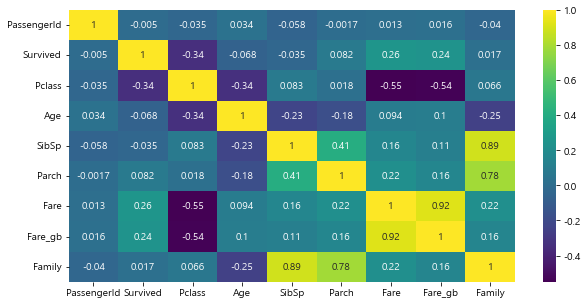

In [108]:
df_cor = df_raw.corr(method = 'pearson')
plt.figure(figsize = (10, 5))
sns.heatmap(df_cor, annot = True, cmap = 'viridis')

### 주요 영향 인자 도출
- 성별  
    남성의 사망자가 높게 나타남
- 탑승지  
     G에서 탑승한 사람의 생존율이 높게 나타남
- 승객 등급  
     2등급의 승객의 생존율이 높게 나타남
- 선실 구분  
     G선실의 승객의 생존율이 높게 나타남
-  연령대  
    Middle 연령대의 승객의 생존율이 높게 나타남
- 요금  
    요금이 높은 승객의 생존율이 높게 나타남

# 4. 모델링

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc

### 의사결정나무 분석

In [112]:
df1 = df_raw.drop(columns = ['PassengerId', 'Ticket', 'Name'])
df1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_gb,Age_gb,Fare_gb,Family
0,0,3,male,22,1,0,7.2500,Gita,S,G,Young,0.0,1
1,1,1,female,38,1,0,71.2833,C85,C,C,Middle,1.0,1
2,1,3,female,26,0,0,7.9250,Gita,S,G,Young,0.0,0
3,1,1,female,35,1,0,53.1000,C123,S,C,Middle,1.0,1
4,0,3,male,35,0,0,8.0500,Gita,S,G,Middle,0.0,0


In [113]:
df1_dummy = pd.get_dummies(df1)

In [114]:
df1_dummy.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_gb,Family,Sex_female,Sex_male,...,Cabin_gb_D,Cabin_gb_E,Cabin_gb_F,Cabin_gb_G,Cabin_gb_T,Age_gb_Child,Age_gb_Middle,Age_gb_OLD,Age_gb_Prime,Age_gb_Young
0,0,3,22,1,0,7.2500,0.0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,38,1,0,71.2833,1.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26,0,0,7.9250,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,35,1,0,53.1000,1.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,3,35,0,0,8.0500,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [115]:
df_train, df_test = train_test_split(df1_dummy, test_size = 0.3, random_state = 1234)
print('학습용 데이터 크기: ', df_train.shape)
print('평가용 데이터 크기: ', df_test.shape)

학습용 데이터 크기:  (623, 174)
평가용 데이터 크기:  (268, 174)


In [116]:
df_train_y = df_train['Survived']
df_train_x = df_train.drop(columns = 'Survived')

df_test_y = df_test['Survived']
df_test_x = df_test.drop(columns = 'Survived')

In [117]:
print(df_train_y.shape)
print(df_train_x.shape)
print(df_test_y.shape)
print(df_test_x.shape)

(623,)
(623, 173)
(268,)
(268, 173)


###### Grid search 이용

In [120]:
para_depth = [depth for depth in range(1, 11)]
para_split = [split for split in range(2, 31, 2)]
para_leaf = [leaf for leaf in range(1, 11)]

In [121]:
estimator = DecisionTreeClassifier(random_state=1234)

param_grid = {'max_depth': para_depth, 'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
grid_dt = GridSearchCV(estimator, param_grid,scoring = 'f1', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score: 
0.752


In [140]:
dt_final = DecisionTreeClassifier(random_state=1234, max_depth = 10, min_samples_leaf=1, min_samples_split= 4)
dt_final.fit(df_train_x, df_train_y)

pred_train_dt = dt_final.predict(df_train_x)
pred_test_dt = dt_final.predict(df_test_x)



In [141]:
print('학습용 데이터 Accuracy: ', dt_final.score(df_train_x, df_train_y))
print('학습용 데이터 Accuracy: ', dt_final.score(df_test_x, df_test_y))

print('학습용 데이터 F1 score: ', f1_score(df_train_y, pred_train_dt))
print('평가용 데이터 F1 score: ', f1_score(df_test_y, pred_test_dt))

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(df_train_y, pred_train_dt))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(df_test_y, pred_test_dt))

print('\n학습용 데이터\n', classification_report(df_train_y, pred_train_dt))
print('평가용 데이터\n', classification_report(df_test_y, pred_test_dt))

학습용 데이터 Accuracy:  0.9486356340288925
학습용 데이터 Accuracy:  0.8395522388059702
학습용 데이터 F1 score:  0.9307359307359309
평가용 데이터 F1 score:  0.7881773399014778

학습용 데이터 혼동행렬: 
 [[376   7]
 [ 25 215]]
평가용 데이터 혼동행렬: 
 [[145  21]
 [ 22  80]]

학습용 데이터
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       383
           1       0.97      0.90      0.93       240

    accuracy                           0.95       623
   macro avg       0.95      0.94      0.94       623
weighted avg       0.95      0.95      0.95       623

평가용 데이터
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.79      0.78      0.79       102

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



### 랜덤 포레스트

###### GridSearch 이용

In [126]:
estimator = RandomForestClassifier(random_state=1234)

param_grid = {'max_depth': para_depth, 'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
grid_rf = GridSearchCV(estimator, param_grid,scoring = 'f1', n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_rf.best_params_))
print('\nbest score: \n{}'.format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score: 
0.758


In [142]:
rf_final = RandomForestClassifier(random_state=1234, max_depth = 10, min_samples_leaf=1, min_samples_split= 4)
rf_final.fit(df_train_x, df_train_y)

pred_train_rf = rf_final.predict(df_train_x)
pred_test_rf = rf_final.predict(df_test_x)

In [143]:
print('학습용 데이터 Accuracy: ', rf_final.score(df_train_x, df_train_y))
print('학습용 데이터 Accuracy: ', rf_final.score(df_test_x, df_test_y))

print('학습용 데이터 F1 score: ', f1_score(df_train_y, pred_train_rf))
print('평가용 데이터 F1 score: ', f1_score(df_test_y, pred_test_rf))

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(df_train_y, pred_train_rf))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(df_test_y, pred_test_rf))

print('\n학습용 데이터\n', classification_report(df_train_y, pred_train_rf))
print('평가용 데이터\n', classification_report(df_test_y, pred_test_rf))

학습용 데이터 Accuracy:  0.9149277688603531
학습용 데이터 Accuracy:  0.8432835820895522
학습용 데이터 F1 score:  0.8819599109131402
평가용 데이터 F1 score:  0.7666666666666666

학습용 데이터 혼동행렬: 
 [[372  11]
 [ 42 198]]
평가용 데이터 혼동행렬: 
 [[157   9]
 [ 33  69]]

학습용 데이터
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       383
           1       0.95      0.82      0.88       240

    accuracy                           0.91       623
   macro avg       0.92      0.90      0.91       623
weighted avg       0.92      0.91      0.91       623

평가용 데이터
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       166
           1       0.88      0.68      0.77       102

    accuracy                           0.84       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.85      0.84      0.84       268



### 그래디언트 부스팅

###### Random Search

In [129]:
para_lr = [lr * 0.1 for lr in range(1, 6)]
para_depth = [depth for depth in range(1, 10)]

estimator = GradientBoostingClassifier(n_estimators=100, random_state=1234)
param_grid = {'learning_rate': para_lr, 'max_depth': para_depth}

In [136]:
grid_gb = RandomizedSearchCV(estimator, param_grid, scoring = 'f1', n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_gb.best_params_))
print('\nbest score: \n{}'.format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=1234)

best parameter: 
{'max_depth': 5, 'learning_rate': 0.2}

best score: 
0.74


In [144]:
gb_final = GradientBoostingClassifier(random_state=1234, max_depth = 5, n_estimators=100, learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)

pred_train_gb = gb_final.predict(df_train_x)
pred_test_gb = gb_final.predict(df_test_x)

In [145]:
print('학습용 데이터 Accuracy: ', gb_final.score(df_train_x, df_train_y))
print('학습용 데이터 Accuracy: ', gb_final.score(df_test_x, df_test_y))

print('학습용 데이터 F1 score: ', f1_score(df_train_y, pred_train_gb))
print('평가용 데이터 F1 score: ', f1_score(df_test_y, pred_test_gb))

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(df_train_y, pred_train_gb))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(df_test_y, pred_test_gb))

print('\n학습용 데이터\n', classification_report(df_train_y, pred_train_gb))
print('평가용 데이터\n', classification_report(df_test_y, pred_test_gb))

학습용 데이터 Accuracy:  0.9678972712680578
학습용 데이터 Accuracy:  0.832089552238806
학습용 데이터 F1 score:  0.9572649572649572
평가용 데이터 F1 score:  0.7567567567567568

학습용 데이터 혼동행렬: 
 [[379   4]
 [ 16 224]]
평가용 데이터 혼동행렬: 
 [[153  13]
 [ 32  70]]

학습용 데이터
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       383
           1       0.98      0.93      0.96       240

    accuracy                           0.97       623
   macro avg       0.97      0.96      0.97       623
weighted avg       0.97      0.97      0.97       623

평가용 데이터
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       166
           1       0.84      0.69      0.76       102

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



### XGBoost

###### grid search

In [146]:
para_lr = [lr * 0.1 for lr in range(1, 6)]
para_depth = [depth for depth in range(1, 10)]

estimator = XGBClassifier(n_estimators = 100, random_state = 1234)
param_grid = {'learning_rate': para_lr, 'max_depth': para_depth}

In [147]:
grid_xgb = GridSearchCV(estimator, param_grid, scoring='f1', n_jobs=-1)
grid_xgb.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_xgb.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_xgb.best_params_))
print('\nbest score: \n{}'.format(grid_xgb.best_score_.round(3)))

[17:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best estimator model: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best parameter: 
{'learning_rate'

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [148]:
xgb_final = XGBClassifier(random_state=1234, max_depth = 4, n_estimators=100, learning_rate=0.1)
xgb_final.fit(df_train_x, df_train_y)

pred_train_xgb = xgb_final.predict(df_train_x)
pred_test_xgb = xgb_final.predict(df_test_x)

[17:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [149]:
print('학습용 데이터 Accuracy: ', xgb_final.score(df_train_x, df_train_y))
print('학습용 데이터 Accuracy: ', gb_final.score(df_test_x, df_test_y))

print('학습용 데이터 F1 score: ', f1_score(df_train_y, pred_train_gb))
print('평가용 데이터 F1 score: ', f1_score(df_test_y, pred_test_gb))

print('\n학습용 데이터 혼동행렬: \n', confusion_matrix(df_train_y, pred_train_gb))
print('평가용 데이터 혼동행렬: \n', confusion_matrix(df_test_y, pred_test_gb))

print('\n학습용 데이터\n', classification_report(df_train_y, pred_train_gb))
print('평가용 데이터\n', classification_report(df_test_y, pred_test_gb))

학습용 데이터 Accuracy:  0.9101123595505618
학습용 데이터 Accuracy:  0.832089552238806
학습용 데이터 F1 score:  0.9572649572649572
평가용 데이터 F1 score:  0.7567567567567568

학습용 데이터 혼동행렬: 
 [[379   4]
 [ 16 224]]
평가용 데이터 혼동행렬: 
 [[153  13]
 [ 32  70]]

학습용 데이터
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       383
           1       0.98      0.93      0.96       240

    accuracy                           0.97       623
   macro avg       0.97      0.96      0.97       623
weighted avg       0.97      0.97      0.97       623

평가용 데이터
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       166
           1       0.84      0.69      0.76       102

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



### SVM

In [150]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled_train_x = scaler.fit_transform(df_train_x)
df_scaled_train_x = pd.DataFrame(df_scaled_train_x, columns = v_feature_name)

df_scaled_test_x = scaler.fit_transform(df_test_x)
df_scaled_test_x = pd.DataFrame(df_scaled_test_x, columns = v_feature_name)

In [154]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print('학습용 데이터 크기: ', svm_scaled.score(df_scaled_train_x, df_train_y))
print('평가용 데이터 크기: ', svm_scaled.score(df_scaled_test_x, df_test_y))

학습용 데이터 크기:  0.8346709470304976
평가용 데이터 크기:  0.7947761194029851


###### gridSearch

In [156]:
para_c = [10 ** c for c in range(-2, 2)]
para_gamma = [10 ** gamma for gamma in range(-2, 2)]

estimator = SVC(random_state=1234)
param_grid = {'C': para_c, 'gamma': para_gamma}

In [157]:
grid_svc = GridSearchCV(estimator, param_grid, scoring = 'f1', n_jobs= -1)
grid_svc.fit(df_scaled_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_svc.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_svc.best_params_))
print('\nbest score: \n{}'.format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=10, gamma=0.01, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.749


In [ ]:
svc_final = SVC(random_state=1234, C = 10, n_estimators=100, gamma = 0.01)
svc_final.fit(df_scaled_train_x, df_train_y)

pred_train_svc = svc_final.predict(df_train_x)
pred_test_svc = svc_final.predict(df_test_x)
